### Compute and visualize network overlap between two existing alases

In this toolbox, we computes the network overlap between any pair of existing atlases. We treat each atlas as the reference atlas, and projected other atlases to the same space as the reference atlas. Then we compute the network overlap between the reference atlas and the projected atlas.

Here I will show you how to use this toolbox to compute and visualize the network overlap between two existing atlases.

If you want to check the network overlap matrix between the Glasser 2016 atlas with Ji2019 networks and the Yeo 17 networks, you can use the following code:


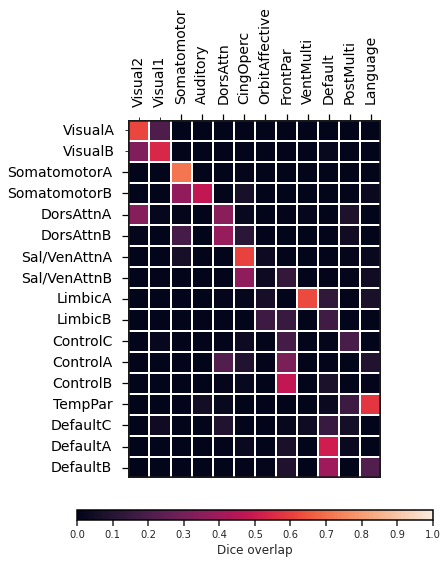

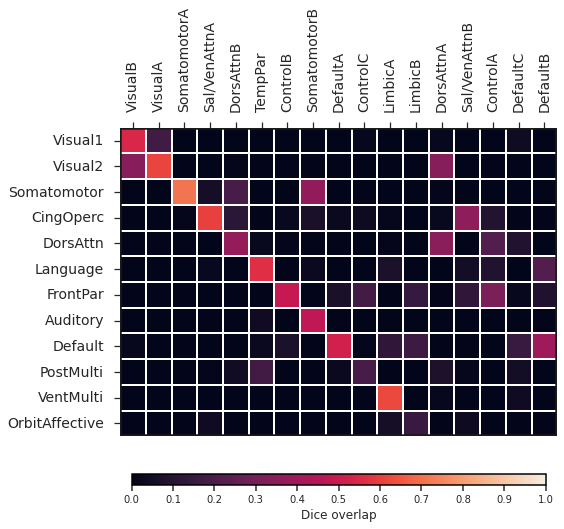

In [3]:
import  cbig_network_correspondence as cnc

# When Yeo 17-network atlas is the reference atlas, the Glasser2016 atlas will be projected to fsaverage6 surface space
overlap_mat1 = cnc.compute_overlap_with_atlases.load_overlap_atlases("TY17", "MG360J12")

# When Glasser2016 atlas atlas is the reference atlas, theYeo 17-network atlas will be projected to fs_LR_32k surface space
overlap_mat2 = cnc.compute_overlap_with_atlases.load_overlap_atlases("MG360J12", "TY17")

# Visualize the overlap matrix between the two atlases
cnc.visualize_overlap_lib.draw_overlap_mat(overlap_mat1, "TY17", "MG360J12", 0, 1, "/home/rkong/storage/unitest_results/figs/TY17_MG360J12")
cnc.visualize_overlap_lib.draw_overlap_mat(overlap_mat2, "MG360J12", "TY17", 0, 1, "/home/rkong/storage/unitest_results/figs/MG360J12_TY17")

However, if you have no interest to check the overlap matrix and just want to see the visualized network overlap between two atlases, you can use the following code:

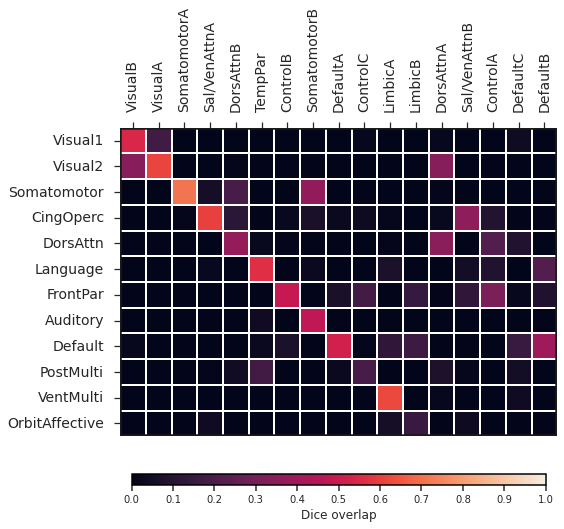

In [4]:
import  cbig_network_correspondence as cnc

# Simply visualize the overlap matrix between the two atlases
cnc.visualize_overlap_lib.draw_overlap_atlases("MG360J12", "TY17", 0, 1, "/home/rkong/storage/unitest_results/figs/MG360J12_TY17")

If you want to check the brain maps of the overlappping regions between two atlases, you can use the following code:

+ To check the overlapping regions between the `Default` network from `MG360J12` atlas and the `DefaultA` network from `TY17` atlas:

This is a hard parcellation.
This is a hard parcellation.
This is a hard parcellation.
This is a hard parcellation.


/home/rkong/storage/miniconda/envs/Ruby_py3/lib/python3.9/site-packages/nibabel/freesurfer/io.py:62: UserWarning: Unknown extension code.
  warnings.warn('Unknown extension code.')
/home/rkong/storage/miniconda/envs/Ruby_py3/lib/python3.9/site-packages/nibabel/freesurfer/io.py:188: UserWarning: No volume information contained in the file
  warnings.warn('No volume information contained in the file')


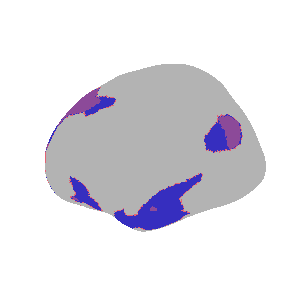

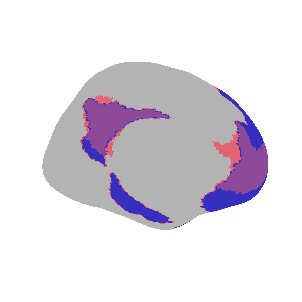

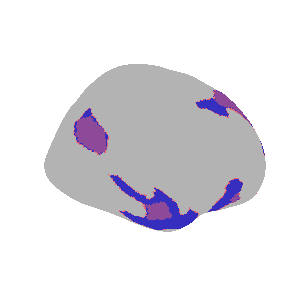

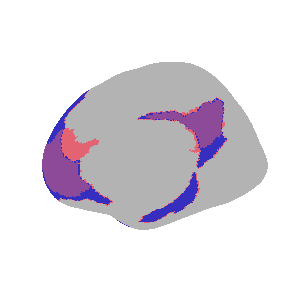

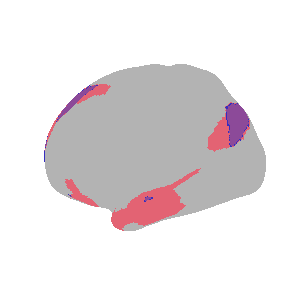

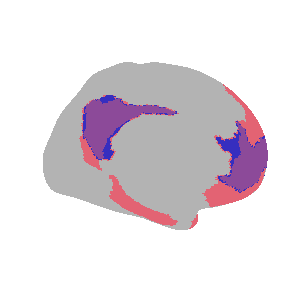

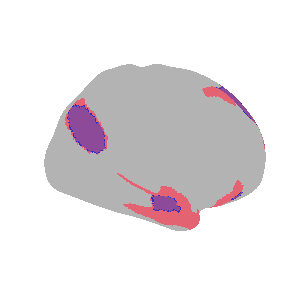

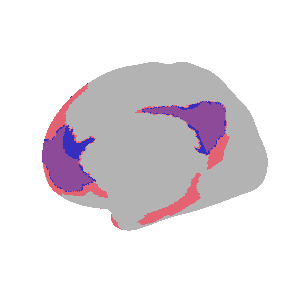

In [1]:
import  cbig_network_correspondence as cnc

# When Yeo 17-network atlas is the reference atlas
overlap_data = cnc.compute_overlap_with_atlases.obtain_overlap_atlases("TY17", "MG360J12", "DefaultA", "Default")
# Yeo 17-network atlas is in fsaverage6 surface space
cnc.visualize_overlap_lib.draw_overlap_map("fsaverage6", overlap_data, "/home/rkong/storage/unitest_results/figs/TY17_MG360J12_DefaultA_Default")

# When Glasser2016 atlas atlas is the reference atlas
overlap_data = cnc.compute_overlap_with_atlases.obtain_overlap_atlases("MG360J12", "TY17", "Default", "DefaultA")
# Glasser2016 atlas is in fs_LR_32k surface space
cnc.visualize_overlap_lib.draw_overlap_map("fs_LR_32k", overlap_data, "/home/rkong/storage/unitest_results/figs/MG360J12_TY17_Default_DefaultA", [-4, -31, 18])

### Compute and visualize overlap between any metric data and an existing atlas

In this toolbox, we also allow users to upload their own data and compute the network overlap between the data and an existing atlas. We treat the data as the reference, and projected the atlas to the same space as the reference data. For a metric data, we binarize the data use `Data_Threshold`, then we compute the network overlap between the binarized data and the projected atlas. Here we provide an example data to show you how to use this toolbox.

You can load the example data by using the following code. In this example, we will compute the overlap between thie example data and the Glasser2016 atlas. Since the example data is in FSLMNI2mm space, we will project the Glasser2016 atlas to FSLMNI2mm space and compute the overlap matrix.

/home/rkong/storage/miniconda/envs/Ruby_py3/lib/python3.9/site-packages/cbig_network_correspondence/data/examples/Exemplar1_pos
/home/rkong/storage/miniconda/envs/Ruby_py3/lib/python3.9/site-packages/cbig_network_correspondence/data/examples/Exemplar1.nii.gz
This is a soft parcellation or metric data.
This is a hard parcellation.


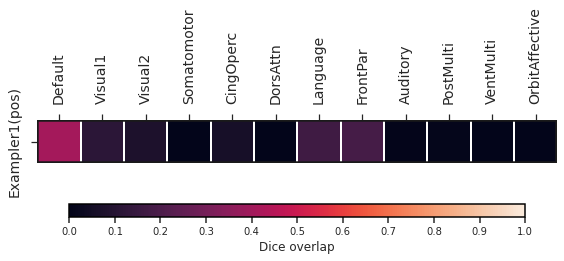

In [4]:
import  cbig_network_correspondence as cnc

example = cnc.load_example
# the example config file
print(example.example_config)
# the path to the example data
print(example.example_nii)
# construct parameters for example data
data_params = cnc.compute_overlap_with_atlases.DataParams(example.example_config, example.example_nii)

# In this example, we will compute the overlap between thie example data and the Glasser2016 atlas.
# Since the example data is in FSLMNI2mm space, we will project the Glasser2016 atlas to
# FSLMNI2mm space and compute the overlap matrix.
overlap_mat = cnc.compute_overlap_with_atlases.compute_overlap_data(data_params, "MG360J12")
# Visualize the overlap matrix
cnc.visualize_overlap_lib.draw_overlap_mat(overlap_mat, "Exampler1(pos)", "MG360J12", 0, 1, "/home/rkong/storage/unitest_results/figs/exampler1_pos_MG360J12")

Based on the visualized overlap matrix, we can notice that the example data overlapped the most with the Default network from Glasser2016. If we want to check the overlapping regions between the example data and the Default network from Glasser2016, we can use the following code:

/home/rkong/storage/miniconda/envs/Ruby_py3/lib/python3.9/site-packages/cbig_network_correspondence/data/examples/Exemplar1_pos
/home/rkong/storage/miniconda/envs/Ruby_py3/lib/python3.9/site-packages/cbig_network_correspondence/data/examples/Exemplar1.nii.gz
This is a soft parcellation or metric data.
This is a hard parcellation.


/home/rkong/storage/miniconda/envs/Ruby_py3/lib/python3.9/site-packages/cbig_network_correspondence/visualize_overlap_lib.py:211: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  new_image = image.new_img_like(roi_image_header, overlap_data)


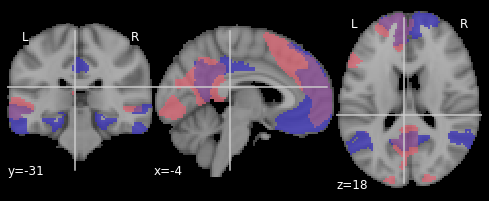

In [2]:
import  cbig_network_correspondence as cnc

example = cnc.load_example
# the example config file
print(example.example_config)
# the path to the example data
print(example.example_nii)
# construct parameters for example data
data_params = cnc.compute_overlap_with_atlases.DataParams(example.example_config, example.example_nii)

overlap_data = cnc.compute_overlap_with_atlases.obtain_overlap_data(data_params, 'MG360J12', 'Default')
# By default we use coords=[-4, -31, 18] to visualize volumetric data, you can change it to any other coordinates
cnc.visualize_overlap_lib.draw_overlap_map("FSLMNI2mm", overlap_data, "/home/rkong/storage/unitest_results/figs/example_MG360J12_Default", [-4, -31, 18])